In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
movie = pd.read_csv('e:/imdb_top_1000.csv')
movie2 = movie.drop(columns=['Poster_Link', 'Overview','Star1','Star2','Star3','Star4','Certificate'])
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,166544,NaN
996,Giant,1956,201 min,"Drama, Western",7.6,84.0,George Stevens,34075,NaN
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,43374,"30,500,000"
998,Lifeboat,1944,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,26471,NaN


In [3]:
movie2.isnull().sum()

Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
No_of_Votes        0
Gross            169
dtype: int64

In [4]:
movie2.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
movie2['Gross'] = movie2['Gross'].str.replace(',','')
movie2['Gross'] = movie2['Gross'].astype(float)


In [6]:
a = set(movie2['Released_Year'])
max(a)

'PG'

In [7]:
# movie2.loc[movie2['Released_Year']=='PG']
movie2 = movie2.drop(movie2[movie2.Released_Year == 'PG'].index)

In [8]:
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,166544,NaN
996,Giant,1956,201 min,"Drama, Western",7.6,84.0,George Stevens,34075,NaN
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,43374,30500000.0
998,Lifeboat,1944,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,26471,NaN


In [9]:
movie2.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,7.949650,77.972684,2.736974e+05,6.790728e+07
std,0.275407,12.383410,3.275366e+05,1.097546e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,8.100000,87.000000,3.744775e+05,8.010324e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [10]:
movie2['Meta_score'] = movie2['Meta_score'].fillna(movie2['Meta_score'].mean())
movie2.Meta_score.isnull().sum()

0

In [11]:
movie2.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,9.990000e+02,8.300000e+02
mean,7.949650,77.972684,2.736974e+05,6.790728e+07
std,0.275407,11.367710,3.275366e+05,1.097546e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,72.000000,5.547150e+04,3.245338e+06
50%,7.900000,77.972684,1.383560e+05,2.345744e+07
75%,8.100000,85.500000,3.744775e+05,8.010324e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [12]:
movie2.dropna(inplace=True)

In [13]:
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0


In [14]:
#Top 10 phim có doanh thu cao nhất
a = movie2.sort_values('Gross', ascending=False).head(10)
b = a.reset_index()
b = b.iloc[:,[1,9]]
b

,Series_Title,Gross
0,Star Wars: Episode VII - The Force Awakens,936662225.0
1,Avengers: Endgame,858373000.0
2,Avatar,760507625.0
3,Avengers: Infinity War,678815482.0
4,Titanic,659325379.0
5,The Avengers,623279547.0
6,Incredibles 2,608581744.0
7,The Dark Knight,534858444.0
8,Rogue One,532177324.0
9,The Dark Knight Rises,448139099.0


In [15]:
b.Gross = b.Gross*0.000001
b.Gross

0    936.662225
1    858.373000
2    760.507625
3    678.815482
4    659.325379
5    623.279547
6    608.581744
7    534.858444
8    532.177324
9    448.139099
Name: Gross, dtype: float64

In [16]:
b.loc[b.Series_Title == 'Star Wars: Episode VII - The Force Awakens', 'Series_Title'] = 'Star Wars: Episode VII'

In [17]:
b.sort_values('Gross', ascending=False)

,Series_Title,Gross
0,Star Wars: Episode VII,936.662225
1,Avengers: Endgame,858.373000
2,Avatar,760.507625
3,Avengers: Infinity War,678.815482
4,Titanic,659.325379
5,The Avengers,623.279547
6,Incredibles 2,608.581744
7,The Dark Knight,534.858444
8,Rogue One,532.177324
9,The Dark Knight Rises,448.139099


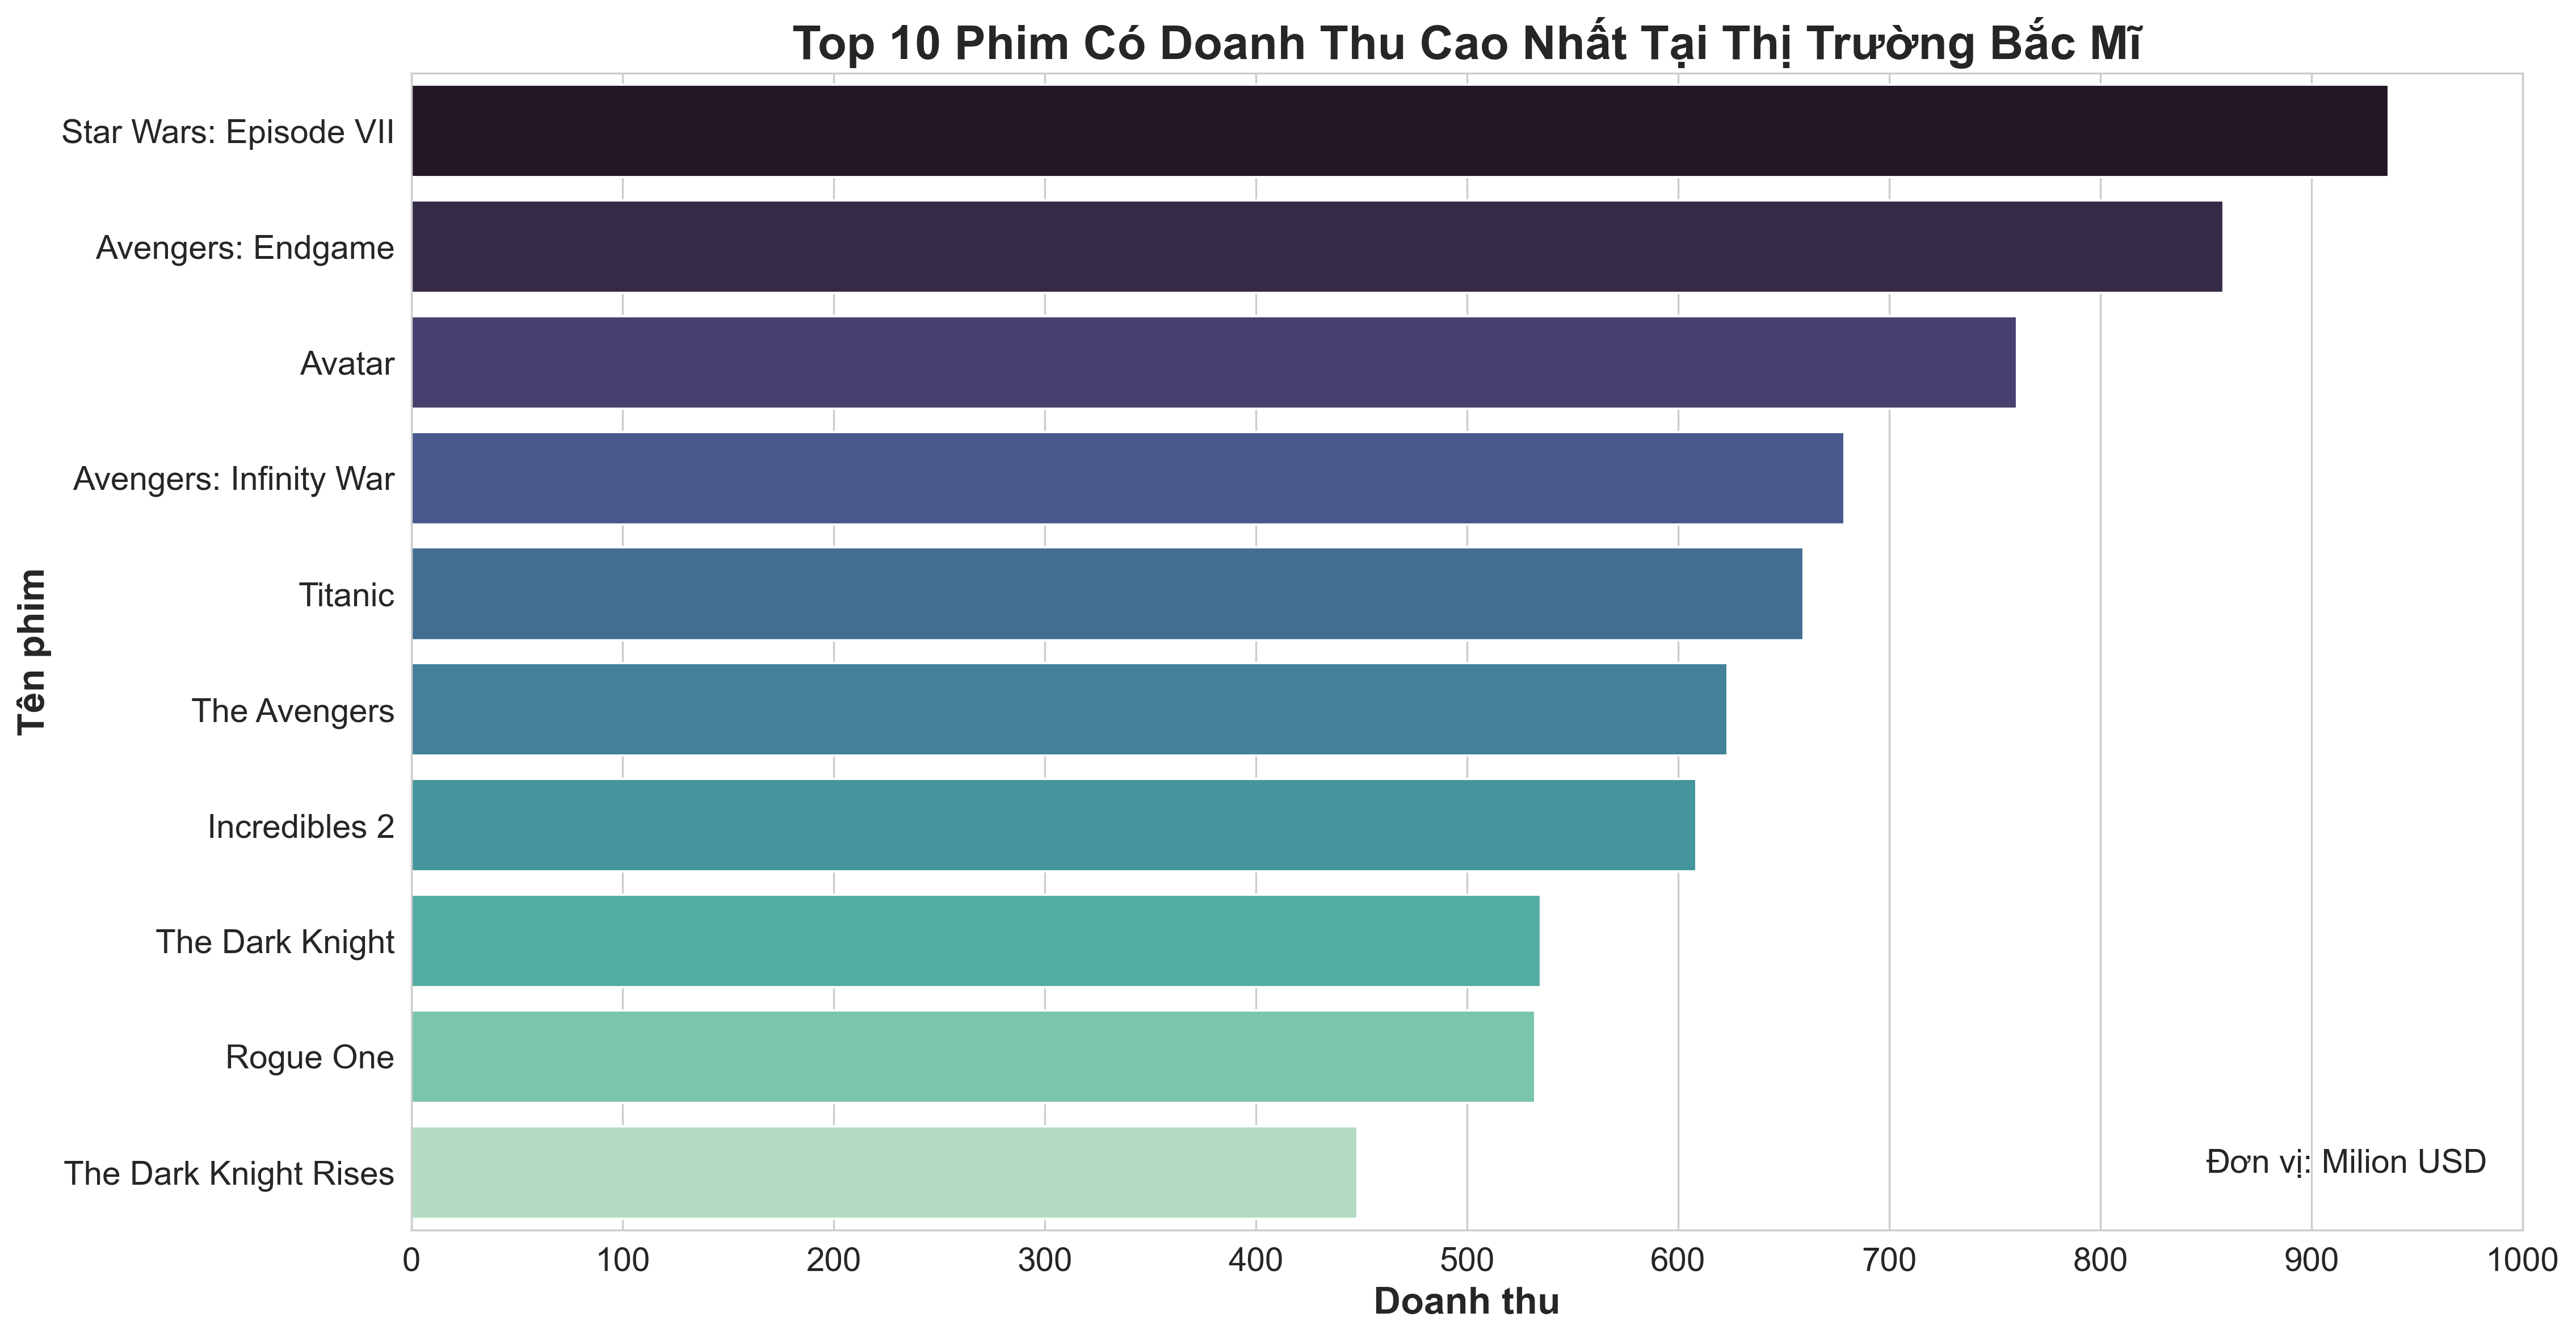

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9), dpi=300)
sns.barplot(x='Gross',y='Series_Title', data=b, palette='mako')
plt.xticks(ticks=np.arange(0,1001,100), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Doanh thu', fontsize=16, fontweight='bold')
plt.ylabel('Tên phim', fontsize=16, fontweight='bold')
plt.text(850,9,'Đơn vị: Milion USD', {'size':14})
plt.title('Top 10 Phim Có Doanh Thu Cao Nhất Tại Thị Trường Bắc Mĩ', fontsize=20, fontweight='bold')
plt.show()

In [19]:
a = movie2.groupby('Director').count().sort_values('Runtime', ascending=False)
a = a.head(10)
c = a.reset_index()
c = c.iloc[:,[0,1]]
c

,Director,Series_Title
0,Steven Spielberg,13
1,Martin Scorsese,10
2,Alfred Hitchcock,9
3,Quentin Tarantino,8
4,Clint Eastwood,8
5,David Fincher,8
6,Christopher Nolan,8
7,Woody Allen,8
8,Rob Reiner,7
9,Hayao Miyazaki,7


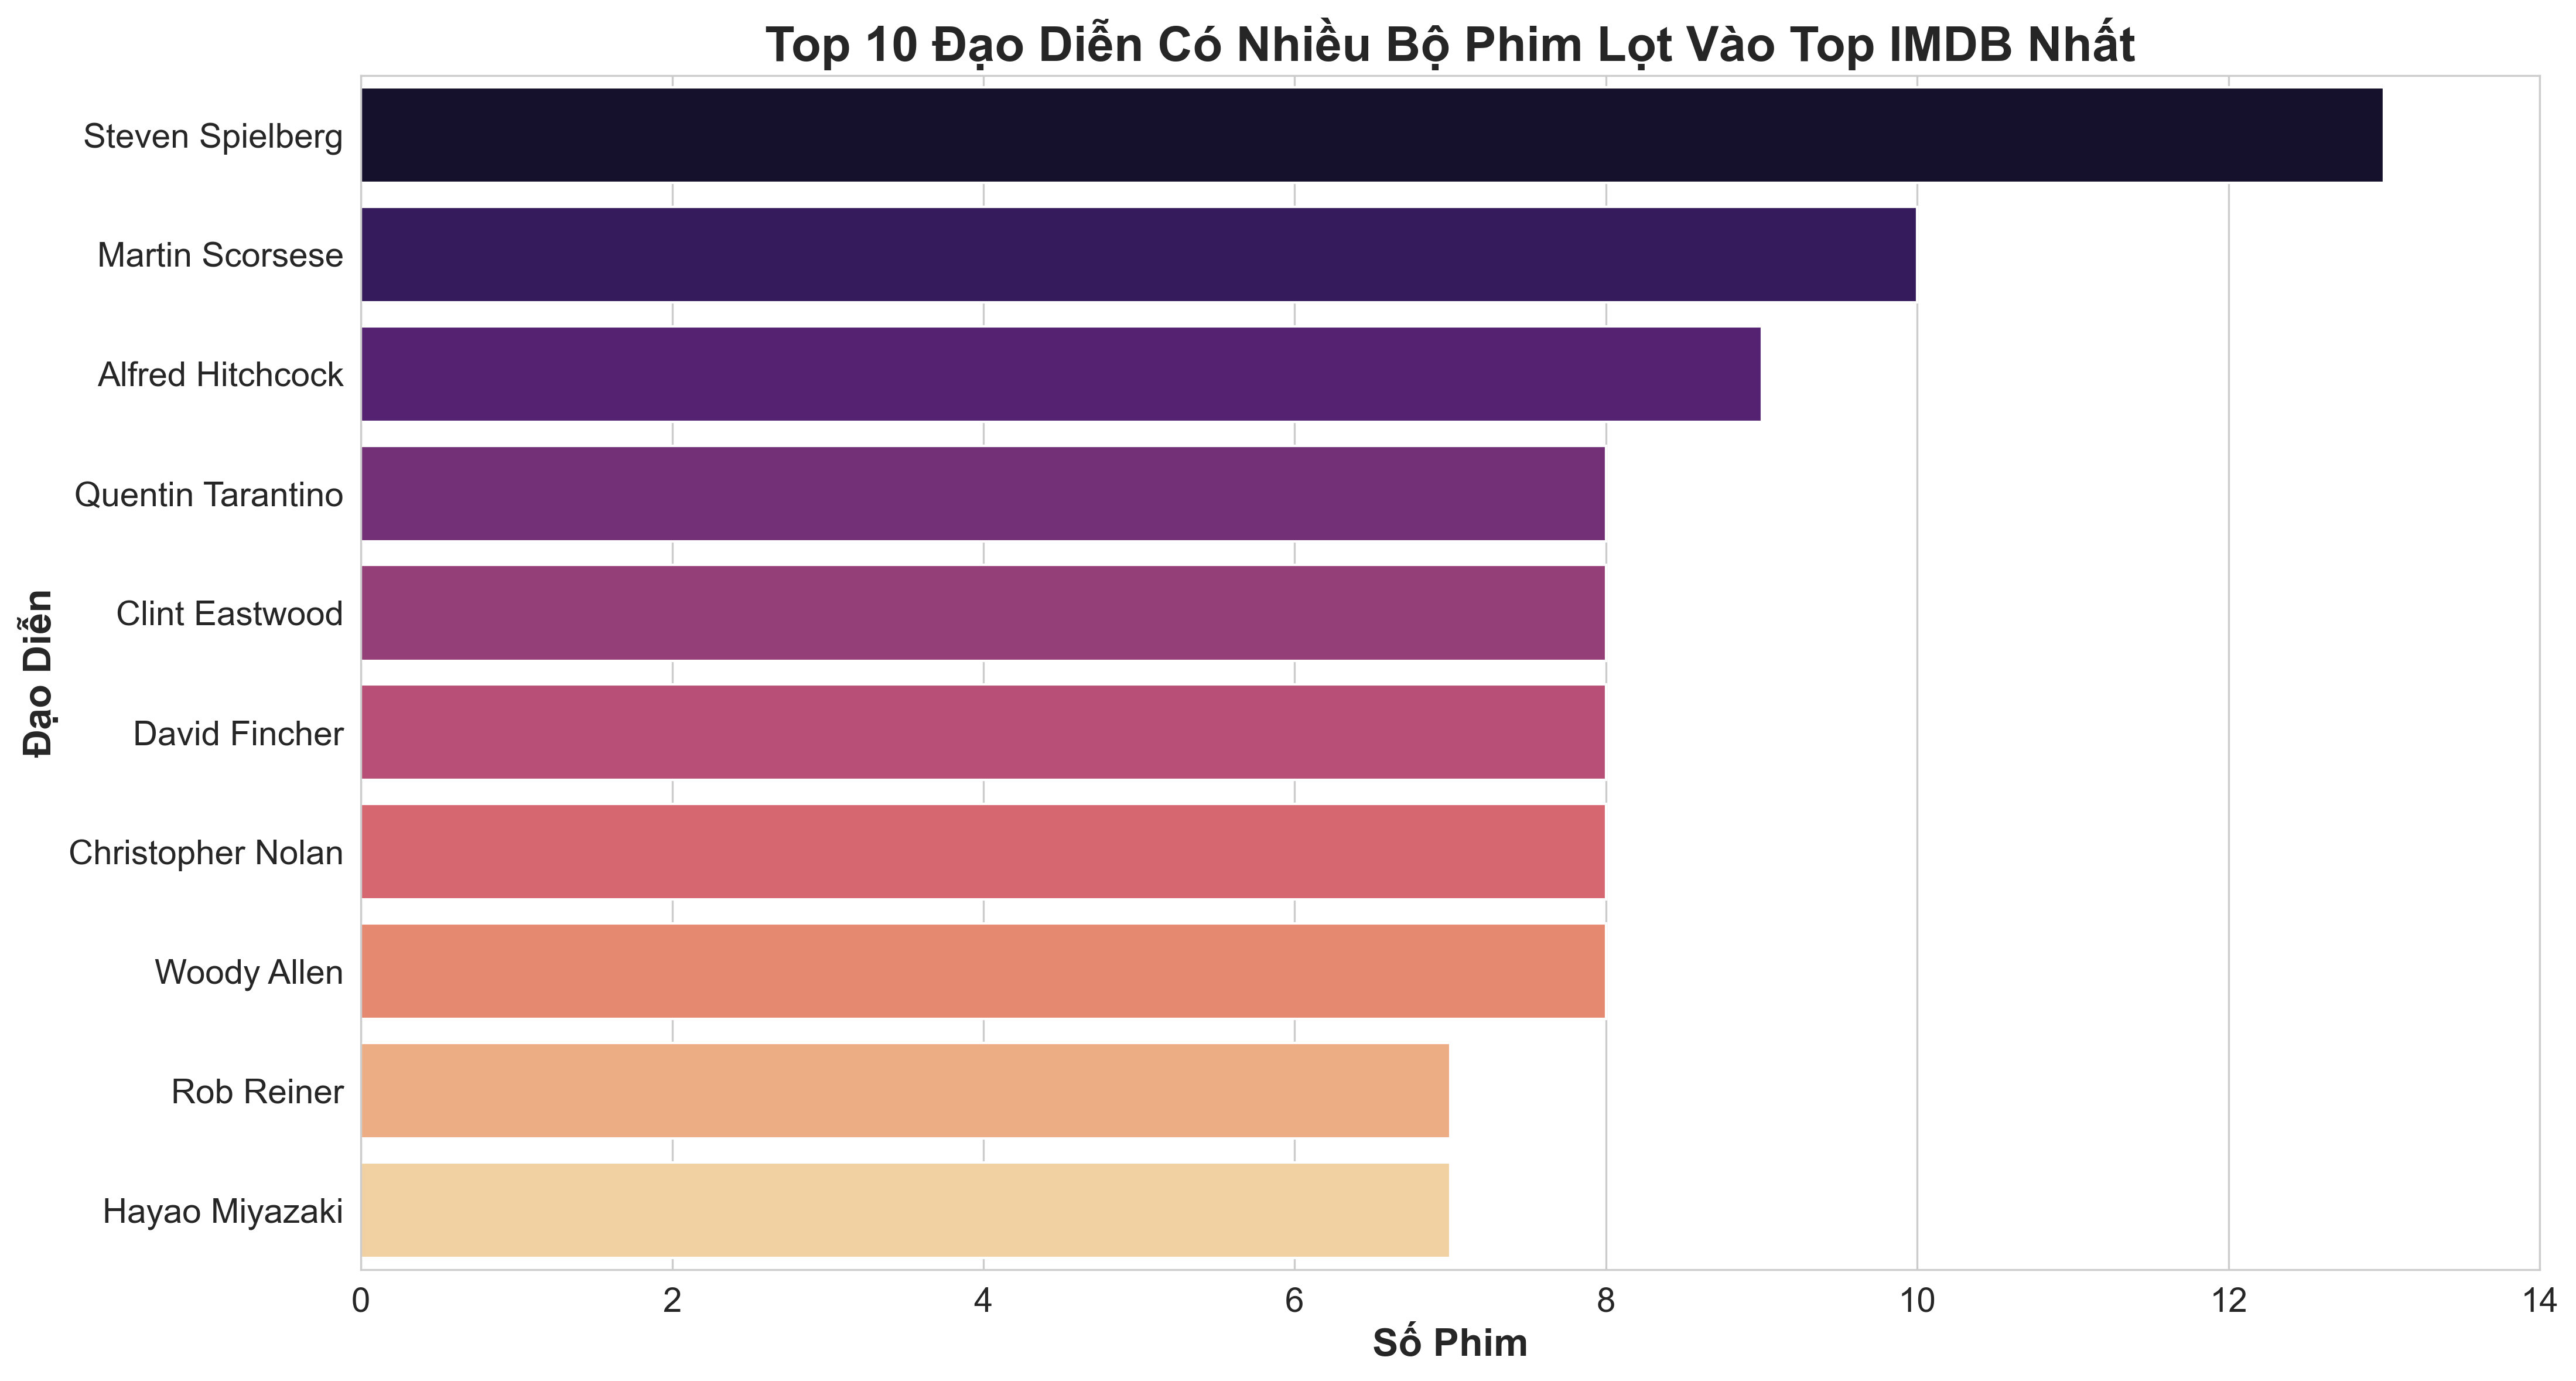

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9), dpi=300)
sns.barplot(x='Series_Title',y='Director', data=c, palette='magma')
plt.xticks(ticks=np.arange(0,15,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Số Phim', fontsize=16, fontweight='bold')
plt.ylabel('Đạo Diễn', fontsize=16, fontweight='bold')
plt.title('Top 10 Đạo Diễn Có Nhiều Bộ Phim Lọt Vào Top IMDB Nhất', fontsize=20, fontweight='bold')
plt.show()

In [21]:
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0


In [22]:
movie3 = movie2.copy()
movie3

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0


In [23]:
import re
action = movie3.loc[movie3['Genre'].str.contains('^Action', regex = True)]
adventure = movie3.loc[movie3['Genre'].str.contains('^Adventure', regex = True)]
animation = movie3.loc[movie3['Genre'].str.contains('^Animation', regex = True)]
drama = movie3.loc[movie3['Genre'].str.contains('^Drama', regex = True)]
comedy = movie3.loc[movie3['Genre'].str.contains('^Comedy', regex = True)]
family = movie3.loc[movie3['Genre'].str.contains('^Family', regex = True)]
crime = movie3.loc[movie3['Genre'].str.contains('^Crime', regex = True)]
mystery = movie3.loc[movie3['Genre'].str.contains('^Mystery', regex = True)]
thriller = movie3.loc[movie3['Genre'].str.contains('^Thriller', regex = True)]
horror = movie3.loc[movie3['Genre'].str.contains('^Horror', regex = True)]
horror

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
49,Psycho,1960,109 min,"Horror, Mystery, Thriller",8.5,97.0,Alfred Hitchcock,604211,32000000.0
75,Alien,1979,117 min,"Horror, Sci-Fi",8.4,89.0,Ridley Scott,787806,78900000.0
271,The Thing,1982,109 min,"Horror, Mystery, Sci-Fi",8.1,57.0,John Carpenter,371271,13782838.0
419,The Exorcist,1973,122 min,Horror,8.0,81.0,William Friedkin,362393,232906145.0
544,Night of the Living Dead,1968,96 min,"Horror, Thriller",7.9,89.0,George A. Romero,116557,89029.0
707,The Innocents,1961,100 min,Horror,7.8,88.0,Jack Clayton,27007,2616000.0
724,Get Out,2017,104 min,"Horror, Mystery, Thriller",7.7,85.0,Jordan Peele,492851,176040665.0
844,Halloween,1978,91 min,"Horror, Thriller",7.7,87.0,John Carpenter,233106,47000000.0
932,Saw,2004,103 min,"Horror, Mystery, Thriller",7.6,46.0,James Wan,379020,56000369.0
948,The Others,2001,101 min,"Horror, Mystery, Thriller",7.6,74.0,Alejandro Amenábar,337651,96522687.0


In [24]:
animation = animation.sort_values('Gross',ascending=False)
animation1 = animation.head(10)
animation1

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
891,Incredibles 2,2018,118 min,"Animation, Action, Adventure",7.6,80.0,Brad Bird,250057,608581744.0
596,Toy Story 4,2019,100 min,"Animation, Adventure, Comedy",7.8,84.0,Josh Cooley,203177,434038008.0
43,The Lion King,1994,88 min,"Animation, Adventure, Drama",8.5,88.0,Roger Allers,942045,422783777.0
151,Toy Story 3,2010,103 min,"Animation, Adventure, Comedy",8.2,92.0,Lee Unkrich,757032,415004880.0
242,Finding Nemo,2003,100 min,"Animation, Adventure, Comedy",8.1,90.0,Andrew Stanton,949565,380843261.0
213,Inside Out,2015,95 min,"Animation, Adventure, Comedy",8.1,94.0,Pete Docter,616228,356461711.0
330,Zootopia,2016,108 min,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,434143,341268248.0
146,Up,2009,96 min,"Animation, Adventure, Comedy",8.2,88.0,Pete Docter,935507,293004164.0
245,"Monsters, Inc.",2001,92 min,"Animation, Adventure, Comedy",8.1,79.0,Pete Docter,815505,289916256.0
651,Shrek,2001,90 min,"Animation, Adventure, Comedy",7.8,84.0,Andrew Adamson,613941,267665011.0


In [25]:
animation1.Gross = animation1.Gross*0.000001


C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


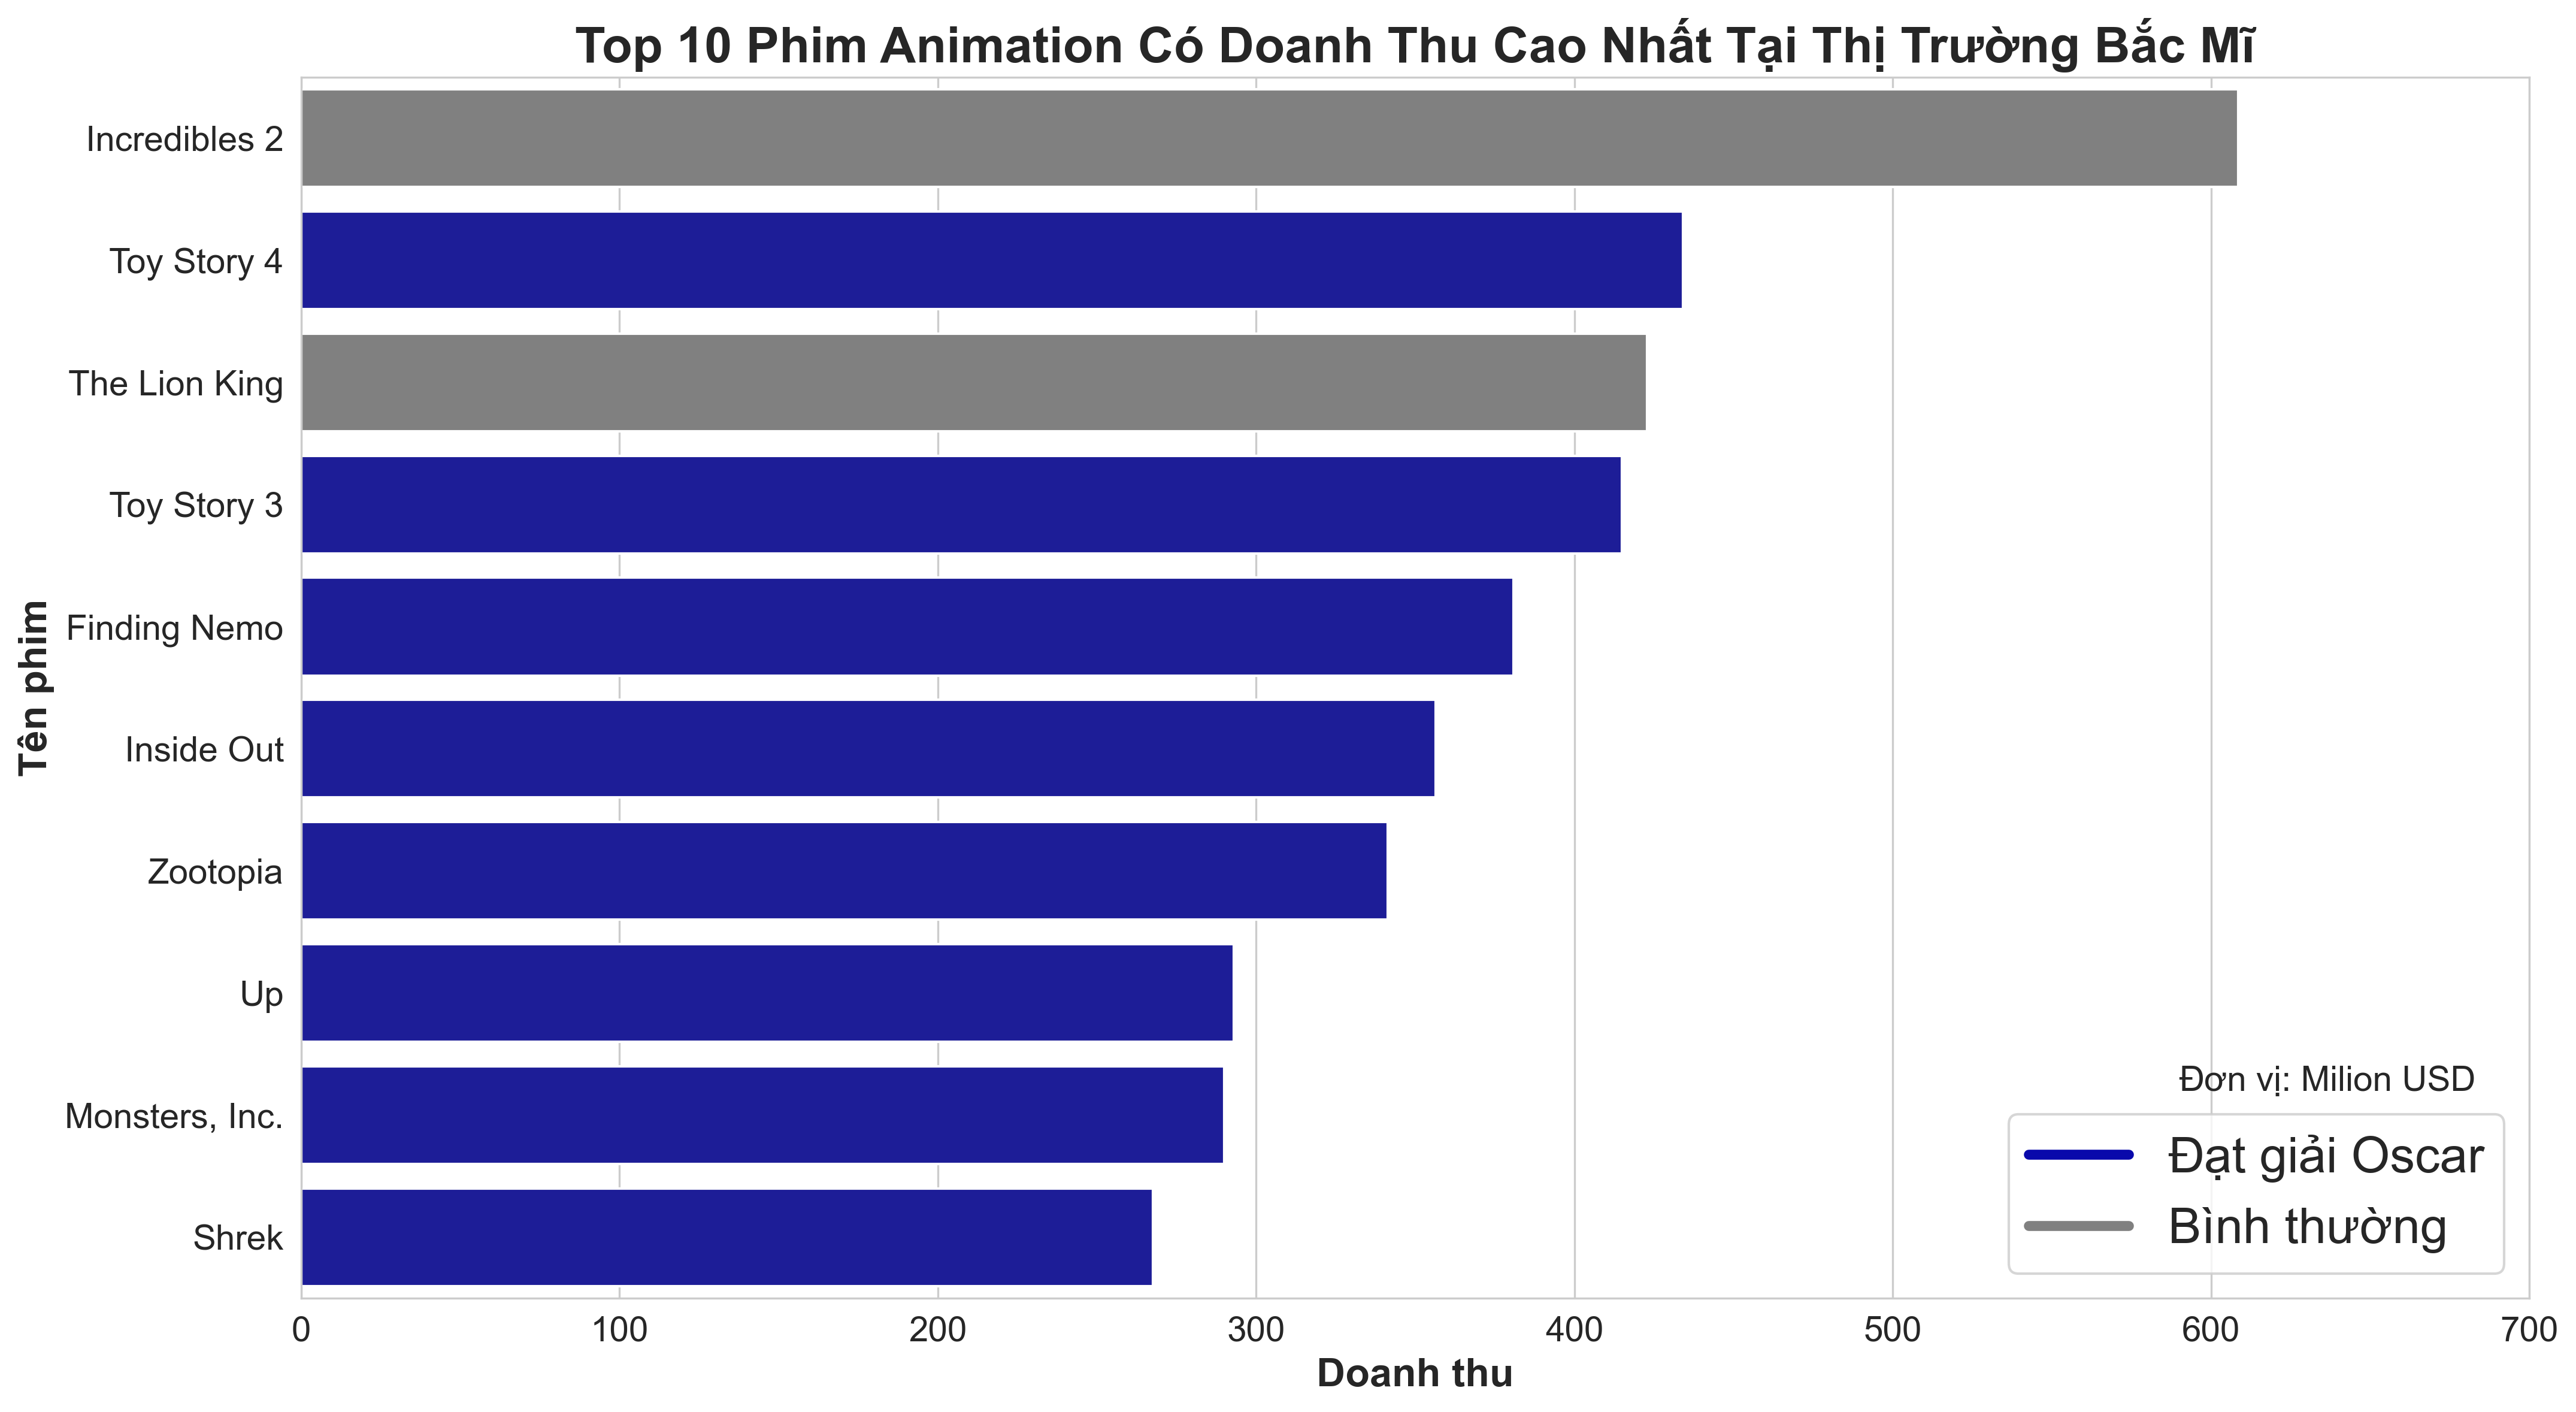

In [26]:
from matplotlib.lines import Line2D
sns.set_style('whitegrid')
plt.figure(figsize=(16,9), dpi=300)
clrs = ['#0909ab' if ((x > 414) & (x < 416)) | ((x > 380) & (x < 381))| ((x > 292) & (x < 294)) | ((x > 266) & (x < 268)) | ((x > 355) & (x < 357)) | ((x > 340) & (x < 342)) | ((x > 433) & (x < 435)) | ((x > 288) & (x < 290)) else 'gray' for x in animation1['Gross']]
sns.barplot(x='Gross',y='Series_Title', data=animation1, palette=clrs)
plt.xticks(ticks=np.arange(0,800,100), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Doanh thu', fontsize=16, fontweight='bold')
plt.ylabel('Tên phim', fontsize=16, fontweight='bold')
plt.text(590,7.8,'Đơn vị: Milion USD', {'size':14})
plt.title('Top 10 Phim Animation Có Doanh Thu Cao Nhất Tại Thị Trường Bắc Mĩ', fontsize=20, fontweight='bold')
legend_elements = [Line2D([0], [0], color='#0909ab', lw=4, ),
                  Line2D([0], [0], color='gray', lw=4)]
plt.legend(legend_elements,['Đạt giải Oscar','Bình thường'], prop={'size': 20})
plt.show()

In [27]:
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0


In [28]:
action_total = action.count()['Gross']
drama_total = drama.count()['Gross']
adventure_total = adventure.count()['Gross']
crime_total = crime.count()['Gross']
family_total = family.count()['Gross']
thriller_total = thriller.count()['Gross']
animation_total = animation.count()['Gross']
mystery_total = mystery.count()['Gross']
comedy_total = comedy.count()['Gross']
horror_total = horror.count()['Gross']

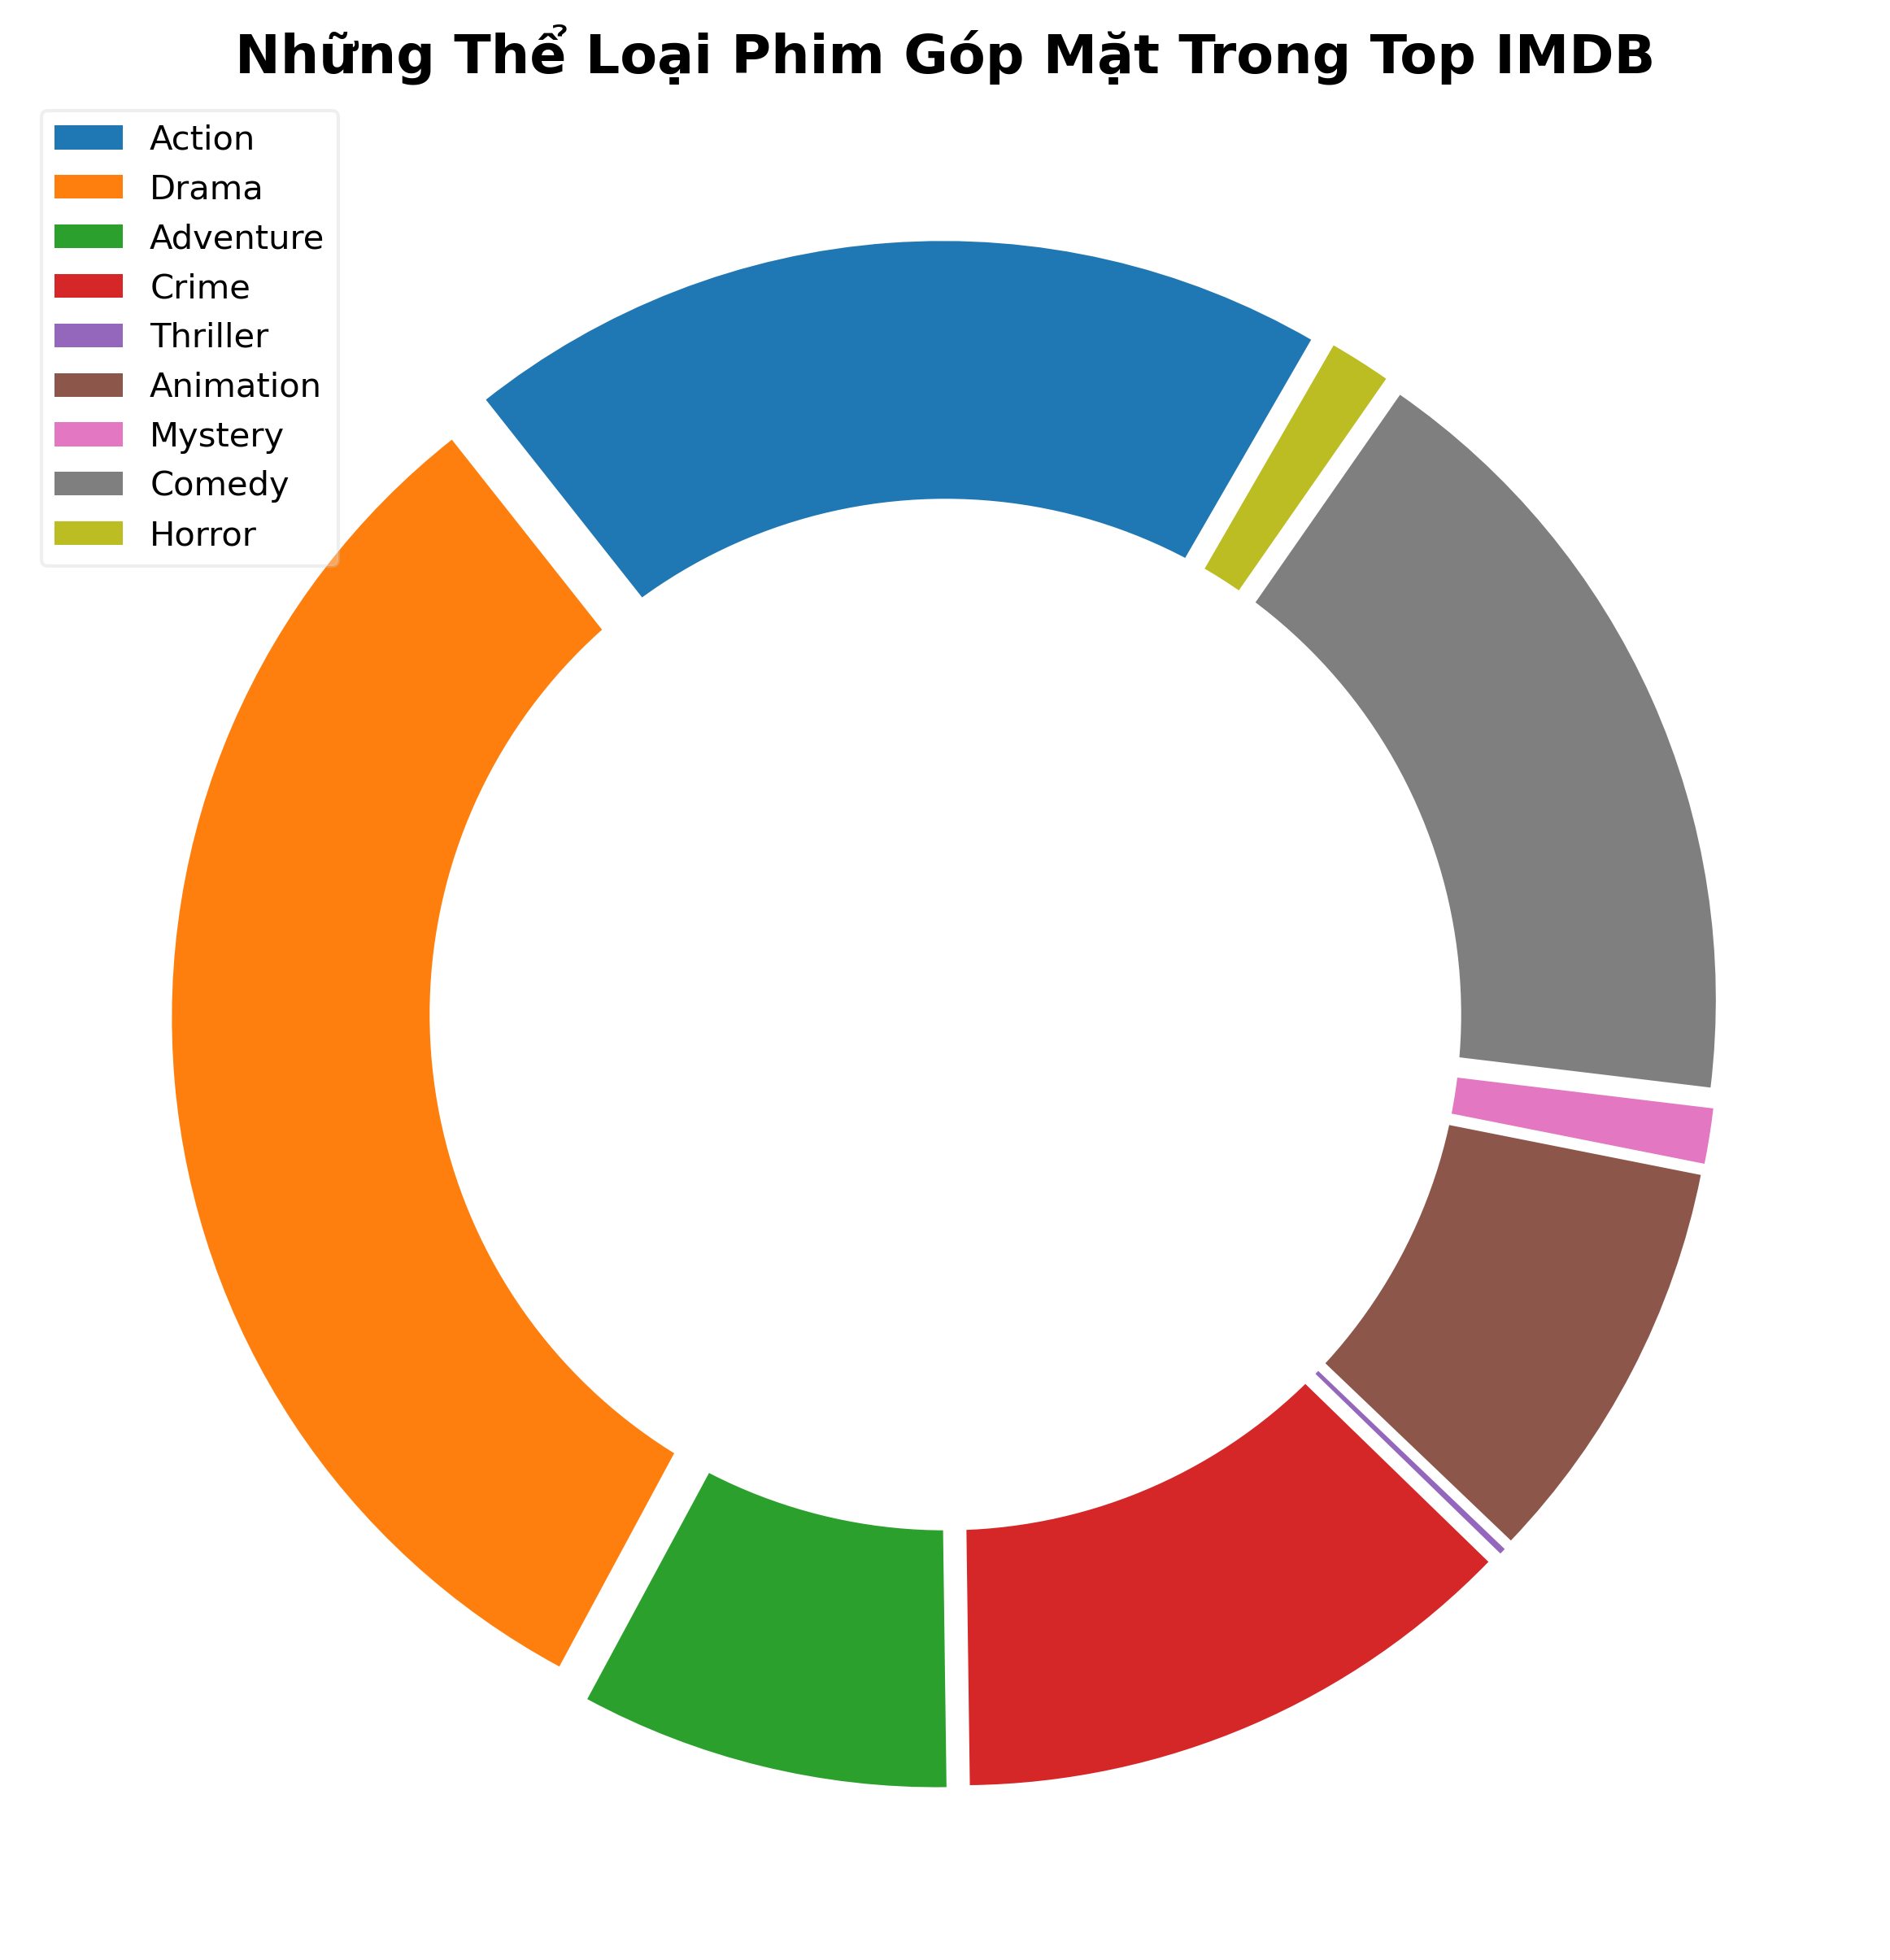

In [29]:
plt.figure(figsize=(20,10), dpi=300)
plt.style.use('default')
plt.pie([action_total,drama_total,adventure_total,crime_total,thriller_total,animation_total,mystery_total,comedy_total, horror_total], startangle=60, pctdistance=0.5,  explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.legend(labels=['Action','Drama','Adventure','Crime','Thriller','Animation','Mystery','Comedy','Horror'],loc='upper left', framealpha=0.3)
# Tạo vòng tròn 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Những Thể Loại Phim Góp Mặt Trong Top IMDB', fontsize=16, fontweight='bold')
plt.show()

In [30]:
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0


In [31]:
movie2['Runtime'] = movie2['Runtime'].str.replace(' min','')
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0


In [32]:
movie2['Runtime'] = movie2['Runtime'].astype(float)

In [33]:
time = movie2.groupby('Released_Year').mean().sort_values('Runtime', ascending=False)
time = time.reset_index()
time = time.iloc[:,[0,1]]
time

,Released_Year,Runtime
0,1956,220.000000
1,1962,180.000000
2,1965,167.000000
3,1939,156.333333
4,1930,152.000000
...,...,...
89,1935,85.500000
90,1925,85.000000
91,1921,68.000000
92,1926,67.000000


In [34]:
time['Released_Year'] = time['Released_Year'].astype(float)
time

,Released_Year,Runtime
0,1956.0,220.000000
1,1962.0,180.000000
2,1965.0,167.000000
3,1939.0,156.333333
4,1930.0,152.000000
...,...,...
89,1935.0,85.500000
90,1925.0,85.000000
91,1921.0,68.000000
92,1926.0,67.000000


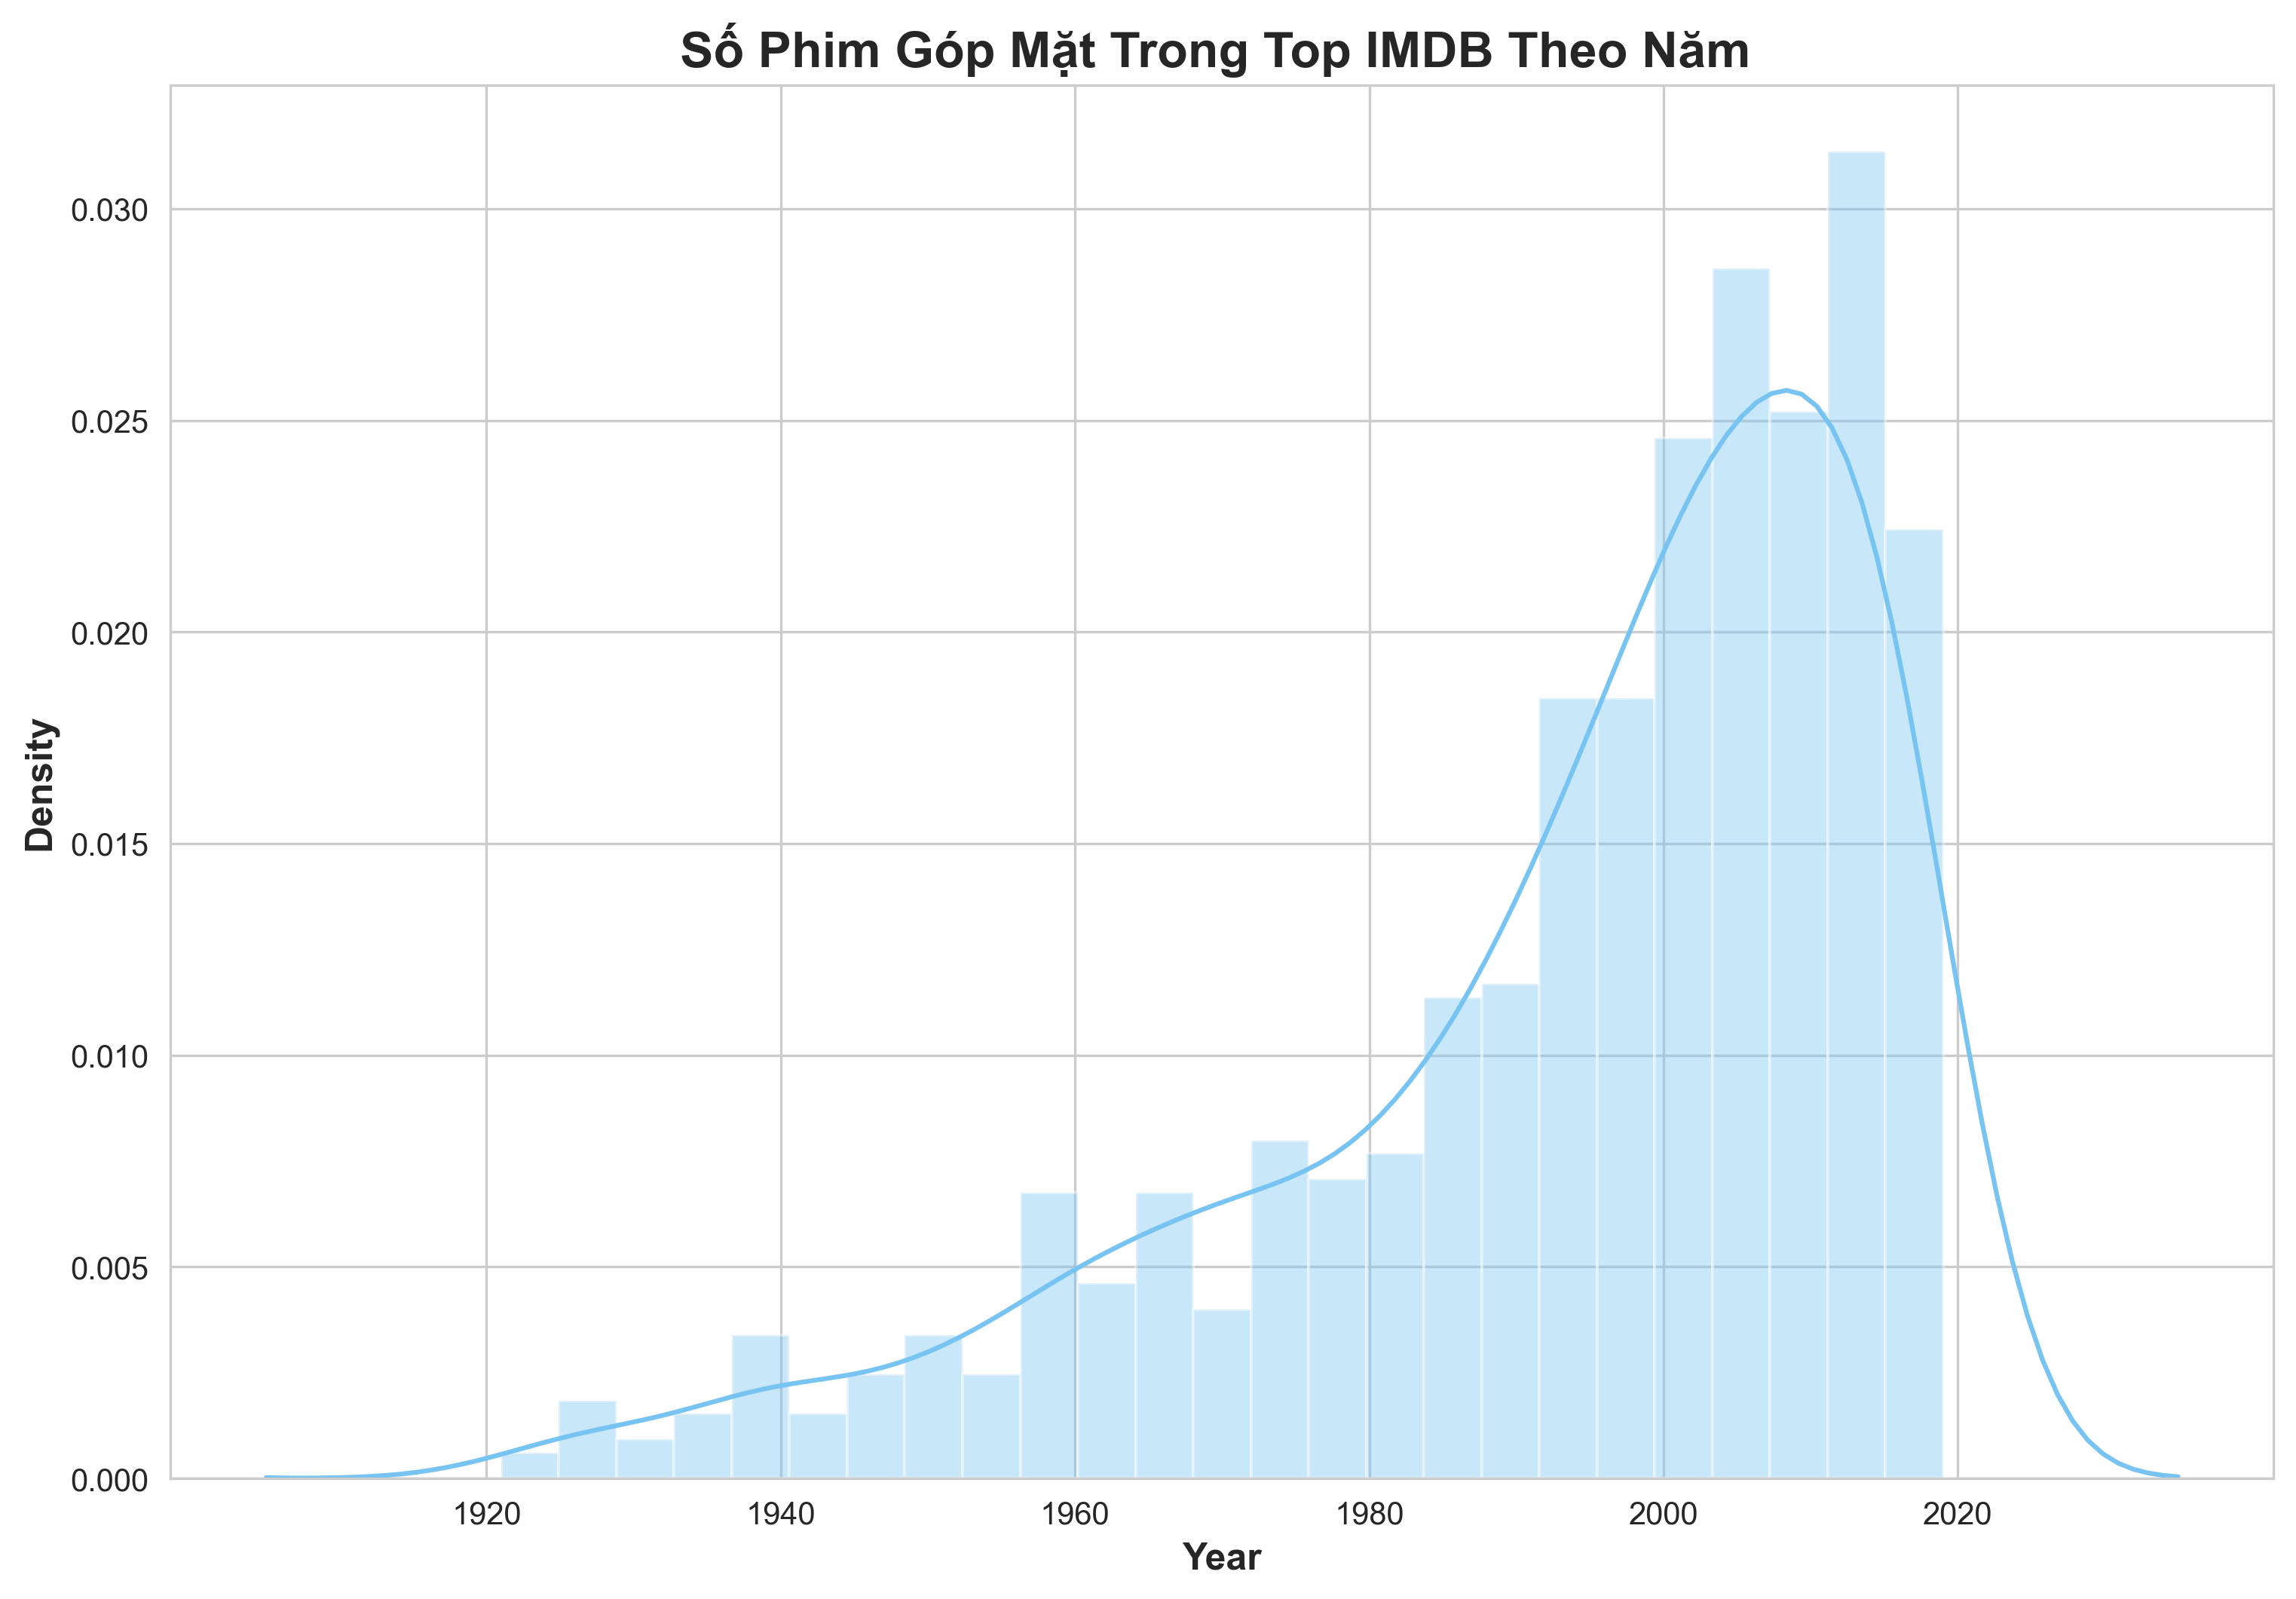

In [40]:
plt.figure(figsize=(12,8), dpi=300)
sns.set_style('whitegrid')
sns.distplot(movie2.Released_Year, color='#77C3F2', bins=25)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.xticks(ticks=np.arange(1920,2021,20))
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Số Phim Góp Mặt Trong Top IMDB Theo Năm ', fontsize=16, fontweight='bold')
plt.show()

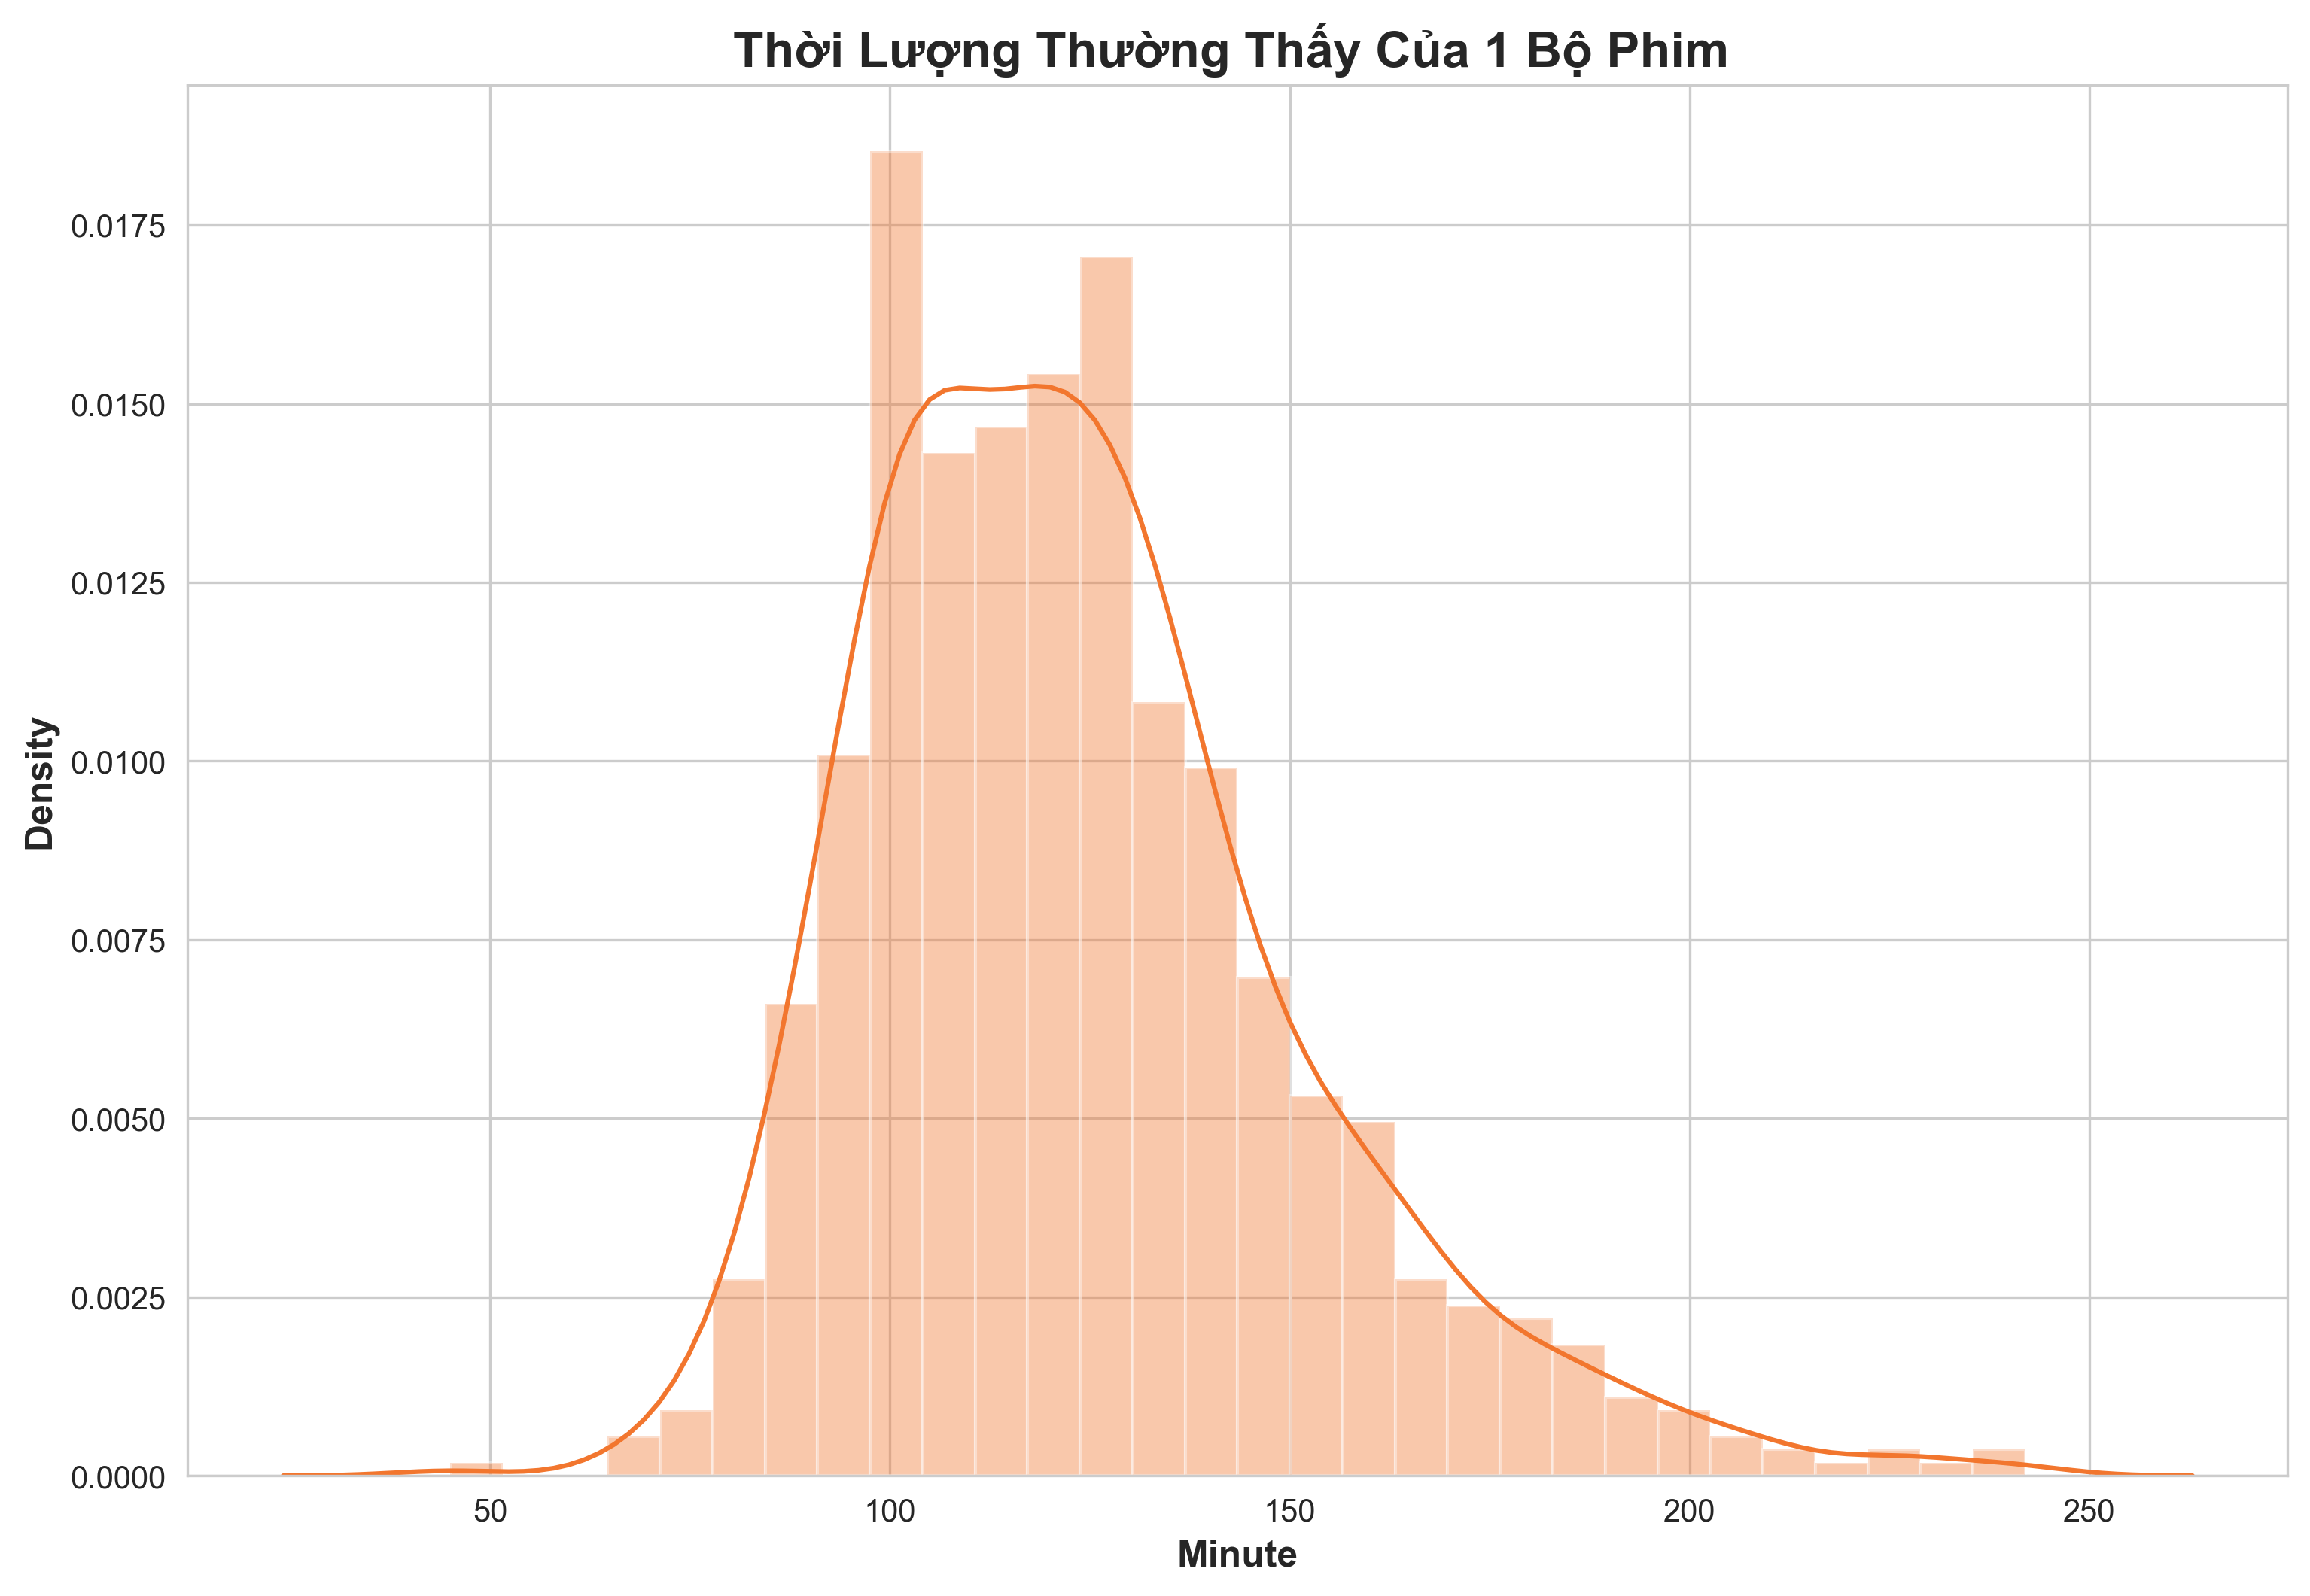

In [41]:
plt.figure(figsize=(12,8), dpi=300)
sns.set_style('whitegrid')
sns.distplot(movie2.Runtime, color='#F2762E', bins=30)
plt.xlabel('Minute', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Thời Lượng Thường Thấy Của 1 Bộ Phim ', fontsize=16, fontweight='bold')
plt.show()

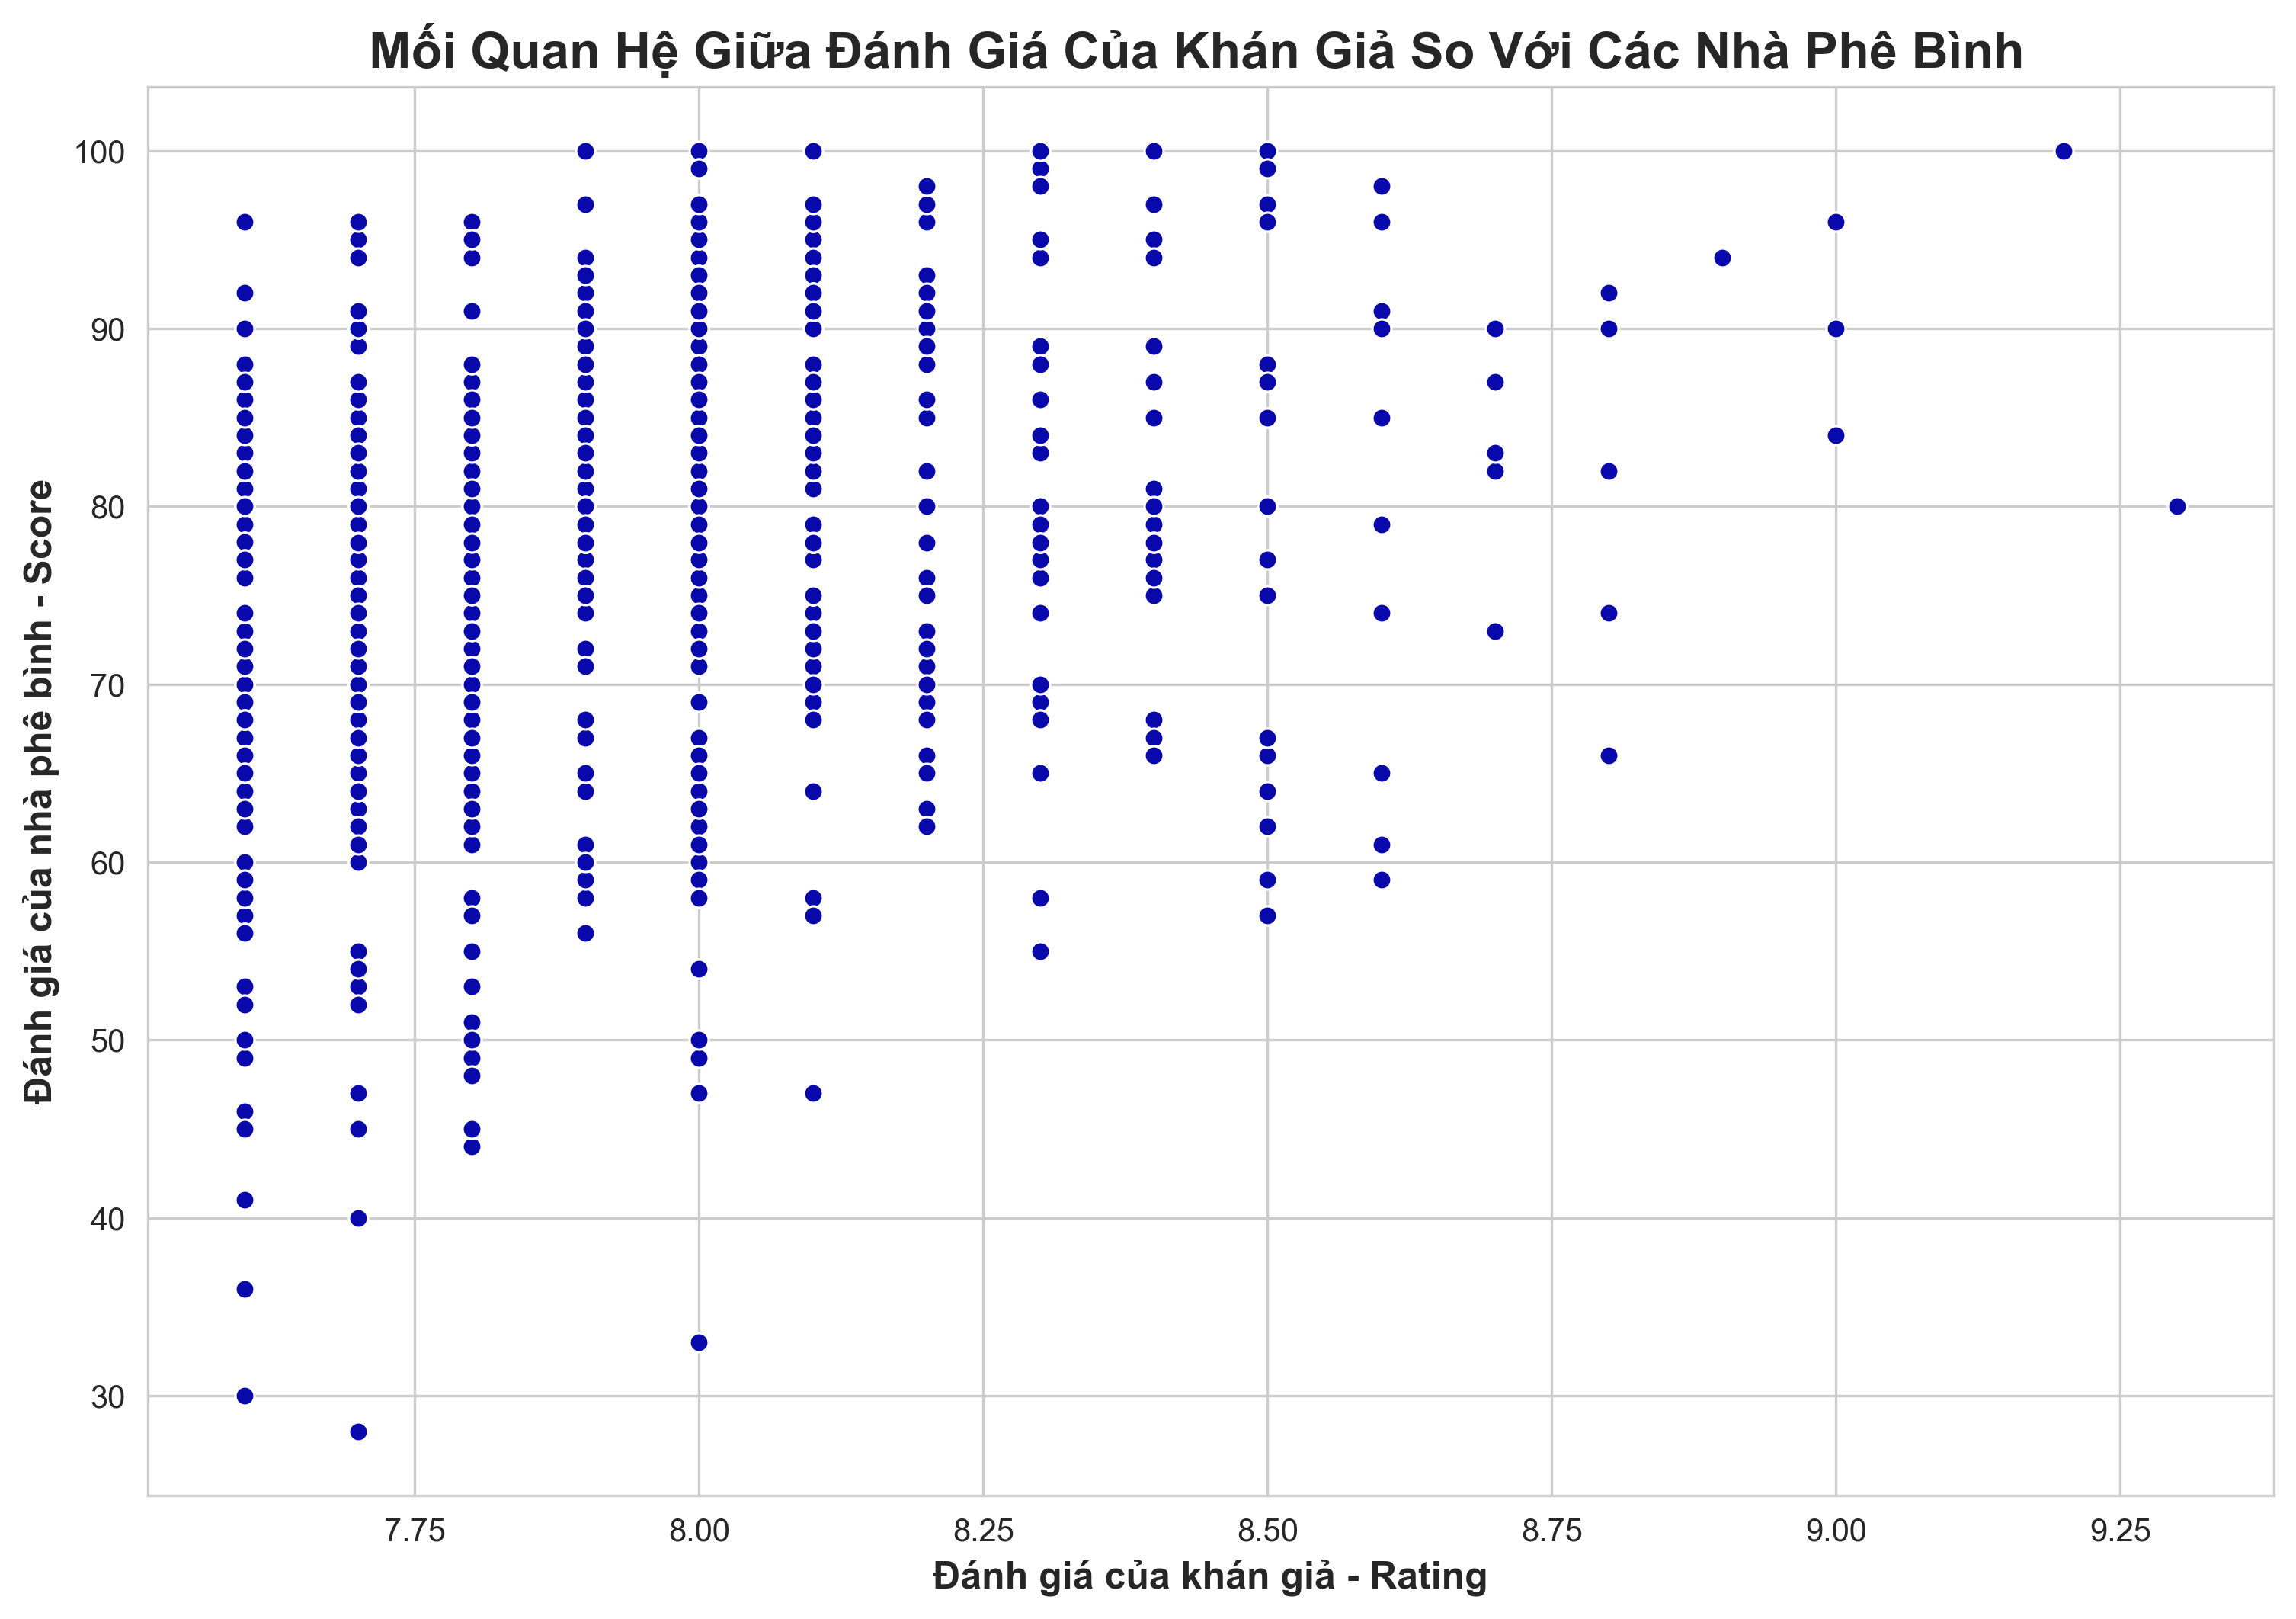

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8), dpi=300)
sns.scatterplot(x=movie2.IMDB_Rating, y=movie2.Meta_score, color='#0909ab')
plt.xlabel('Đánh giá của khán giả - Rating', fontsize=12, fontweight='bold')
plt.ylabel('Đánh giá của nhà phê bình - Score', fontsize=12, fontweight='bold')
plt.title('Mối Quan Hệ Giữa Đánh Giá Của Khán Giả So Với Các Nhà Phê Bình  ', fontsize=16, fontweight='bold')
plt.show()

In [38]:
movie2

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142.0,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157.0,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,696690.0
991,Kelly's Heroes,1970,144.0,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,1378435.0
992,The Jungle Book,1967,78.0,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,87.0,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,13780024.0
